# Dataset Spatial operation methods

<p align="center">
    <img src="../../docs/source/_images/schemes/spatial-operation.png" alt= "dataset prperties" width=150 height=300>
</p>

In [1]:
from pyramids.dataset import Dataset
path = "../../examples/data/dem/DEM5km_Rhine_burned_fill.tif"

In [2]:
dataset = Dataset.read_file(path)

In [3]:
print(dataset)


            Cell size: 5000.0
            Dimension: 125 * 93
            EPSG: 4647
            Number of Bands: 1
            Band names: ['Band_1']
            Mask: -3.4028234663852886e+38
            Data type: float32
            File: ../../examples/data/dem/DEM5km_Rhine_burned_fill.tif
        


(<Figure size 800x800 with 2 Axes>,
 <Axes: title={'center': 'Rhine River Basin'}>)

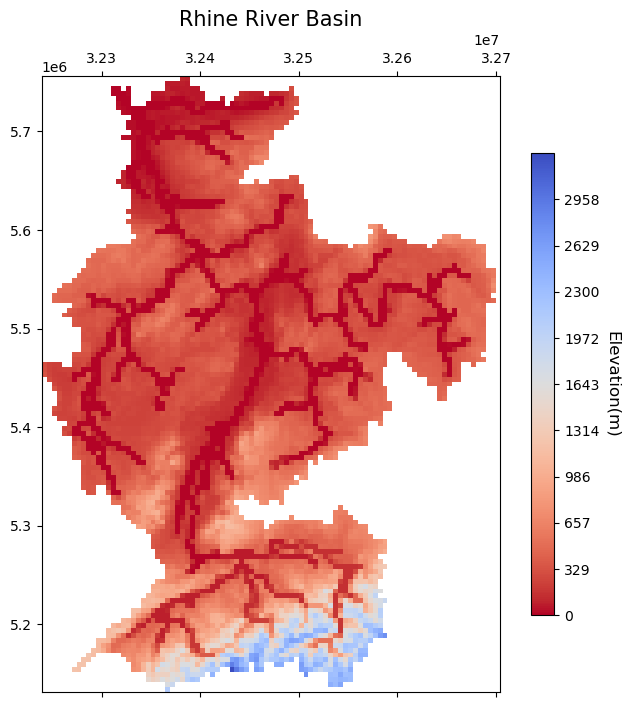

In [4]:
dataset.plot(vmin=0, title="Rhine River Basin", cbar_label="Elevation(m)")

### Resampling

In [ ]:
print(f"Cell size: {dataset.cell_size}")

In [ ]:
dataset_8km = dataset.resample(cell_size=8000, method="bilinear")

In [ ]:
dataset_8km.plot(vmin=0, title="Rhine River Basin (resampled to 8 km)", cbar_label="Elevation(m)")

### Reproject

In [ ]:
print(f"EPSG: {dataset.epsg}")
print(f"Coordinate reference system: {dataset.crs}")
print(f"Dataset dimensions: {dataset.shape}")

In [ ]:
resampled_dataset = dataset.to_crs(4326)

In [ ]:
print(resampled_dataset)

In [ ]:
resampled_dataset.plot(vmin=0, title="Rhine River Basin (reprojected to WGS 84)", cbar_label="Elevation(m)")

### Crop/Clip

In [ ]:
path = "../../examples/data/geotiff/noah-precipitation-1979-europe.tif"
meteo_data = Dataset.read_file(path)

In [ ]:
print(meteo_data)

In [ ]:
fig, ax = meteo_data.plot(
    band=0, figsize=(10, 5), title="Noah daily Precipitation 1979-01-01", cbar_label="Raindall mm/day", vmax=30,
    cbar_length=0.85
)

In [ ]:
meteo_data_r = meteo_data.to_crs(4647)

In [ ]:
meteo_data_r.plot(band=0)

In [ ]:
rhine_meteo_data = meteo_data_r.crop(dataset)

In [ ]:
rhine_meteo_data.plot(band=0)

In [ ]:
rhine_meteo_data